# **Analysis of Earthquakes in North America from 2000 through 2023**

## Spring 2024 Data Science Project

Yvonne Tolbert, Emily Zhu, Adithya Koshanam



---



## 1. Introduction

The purpose of this project is to take you through the different steps of a data science project. To do this, our group has chosen to look at earthquake data between the years 2000-2023 to see how drastic earthquakes have been in the countermineous United States. It's known that climate change can have an impact on intensity of natural disasters, including earthquakes. Earth's temperature has increased about 0.11 degrees each decade, and so we look through 2 decades of earthquake data to see if this rise in temperature has had an effect on the strength of earthquakes throughout this time period.

This is important becasue of the effect that naural disasters can have on human lives. Earthquakes can result in thousands of casualities and cause millions in dollars in damage to the cities affected. By looking at the earthquakes in different states, we can figure out which states are most at risk of earthquakes as climate change gets worse. Not only this, but we can also use this data to observe how the strength of earthquakes change as a result of the climate change.

In this we will be going over these topics of the Data Life Cycle:


1.   Data Collection
2.   Data Cleaning
3.   Data Analysis and Visualization
4.   Hypothesis Testing
5.   Machine Learning
6.   Insights and Conclusions





---

# 2. Data Curation

At this point in the Data Life Cycle, we are looking for a data set that we can use to get the information we need. We needed a reliable source that would give us detailed information about the earthquakes throughout the United States. Luckily, there is a government website that contains all the information we were looking for. All of our data was gathered from [United States Geological Survey](https://earthquake.usgs.gov/earthquakes/search/). We set the search parameters to the years and location were looking for and downloaded the csv. We then added the csv to this project in order for our code to access the data.

The earthquake data we included is from January 1st, 2000 to December 31st, 2023, where the earthquake magnitude was 4.5+ and located in the counterminous United States. We gathered this data from the website and compiled it into one large CSV file.

To begin, we need to import libraries in order to properly develop this project.

Below are our imports:

In [380]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as p
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Now that we have inmported all the necesary libraries, we can display the csv file with the earthquake data. The earthquake CSV has been displayed below.

In [381]:
earthquakes = pd.read_csv('00 to 23 US earthquakes.csv')

display(earthquakes)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-12-01T07:43:27.480Z,32.751833,-115.872833,8.690,4.80,mw,95.0,29.0,0.11210,0.26,...,2024-02-13T17:10:27.150Z,"11 km E of Ocotillo, CA",earthquake,0.170000,0.560000,NaN,6.0,reviewed,ci,ci
1,2023-11-13T07:07:48.263Z,25.744900,-110.139000,10.000,4.50,mb,145.0,131.0,1.00200,0.59,...,2024-01-26T16:37:37.040Z,"81 km W of Las Grullas Margen Derecha, Mexico",earthquake,4.390000,1.899000,0.050,119.0,reviewed,us,us
2,2023-11-08T10:27:49.034Z,31.622000,-103.982000,7.417,5.20,ml(texnet),31.0,52.0,0.00000,0.20,...,2024-03-20T10:37:59.727Z,"Coalson Draw, Texas",earthquake,0.630666,0.841958,0.200,41.0,reviewed,tx,tx
3,2023-10-16T10:20:49.740Z,40.315667,-124.054833,31.060,4.83,mw,45.0,52.0,0.04720,0.12,...,2024-01-06T18:47:18.663Z,"20 km E of Petrolia, CA",earthquake,0.270000,0.590000,NaN,4.0,reviewed,nc,nc
4,2023-09-30T15:26:26.760Z,40.558833,-124.288667,17.880,4.65,mw,45.0,166.0,0.02573,0.20,...,2023-12-09T22:00:42.040Z,"3 km SW of Ferndale, CA",earthquake,0.440000,0.290000,NaN,5.0,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,2000-04-25T14:06:26.070Z,32.130667,-115.095833,5.963,4.50,ml,26.0,246.0,0.61400,0.55,...,2017-02-09T01:28:13.654Z,"11km SW of Estacion Coahuila, B.C., MX",earthquake,3.650000,31.610000,0.202,249.0,reviewed,ci,ci
687,2000-03-24T04:23:45.750Z,27.551000,-111.303000,10.000,5.60,mwc,NaN,NaN,NaN,1.35,...,2022-04-29T19:02:52.631Z,"51 km SSW of San Carlos, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
688,2000-03-04T02:42:01.000Z,49.170000,-114.030000,1.000,4.60,ml,NaN,NaN,NaN,NaN,...,2014-11-07T01:09:38.781Z,"35 km S of Pincher Creek, Canada",earthquake,NaN,NaN,NaN,NaN,reviewed,but,but
689,2000-01-11T14:19:52.090Z,38.769333,-122.913833,5.770,4.59,mw,50.0,48.0,0.05405,0.10,...,2017-03-17T16:02:40.504Z,"6 km N of Geyserville, California",earthquake,0.150000,0.390000,NaN,19.0,reviewed,nc,nc


---

# 2. Data Cleaning

Now that we have the data loaded into a visible csv file, we can edit the data to only include the information that is relevant to us, otherwise known as data cleaning. By getting rid of any irrelevant information we're able to focus on the data that we need to work with and not get distracted by values that help us achieve our goals.

Any unnecessary columns from the dataframe (latitude, longitude, depth, nst, gap, dmin, rms, type, magNst) have been removed below.

In [382]:
earthquakes = earthquakes.drop(['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'type', 'magNst'], axis=1)

display(earthquakes)

,time,mag,magType,net,id,updated,place,horizontalError,depthError,magError,status,locationSource,magSource
0,2023-12-01T07:43:27.480Z,4.80,mw,ci,ci39720706,2024-02-13T17:10:27.150Z,"11 km E of Ocotillo, CA",0.170000,0.560000,NaN,reviewed,ci,ci
1,2023-11-13T07:07:48.263Z,4.50,mb,us,us7000lale,2024-01-26T16:37:37.040Z,"81 km W of Las Grullas Margen Derecha, Mexico",4.390000,1.899000,0.050,reviewed,us,us
2,2023-11-08T10:27:49.034Z,5.20,ml(texnet),tx,tx2023vxae,2024-03-20T10:37:59.727Z,"Coalson Draw, Texas",0.630666,0.841958,0.200,reviewed,tx,tx
3,2023-10-16T10:20:49.740Z,4.83,mw,nc,nc73947830,2024-01-06T18:47:18.663Z,"20 km E of Petrolia, CA",0.270000,0.590000,NaN,reviewed,nc,nc
4,2023-09-30T15:26:26.760Z,4.65,mw,nc,nc73943821,2023-12-09T22:00:42.040Z,"3 km SW of Ferndale, CA",0.440000,0.290000,NaN,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,2000-04-25T14:06:26.070Z,4.50,ml,ci,ci9148478,2017-02-09T01:28:13.654Z,"11km SW of Estacion Coahuila, B.C., MX",3.650000,31.610000,0.202,reviewed,ci,ci
687,2000-03-24T04:23:45.750Z,5.60,mwc,us,usp0009q39,2022-04-29T19:02:52.631Z,"51 km SSW of San Carlos, Mexico",NaN,NaN,NaN,reviewed,us,hrv
688,2000-03-04T02:42:01.000Z,4.60,ml,us,usp0009p89,2014-11-07T01:09:38.781Z,"35 km S of Pincher Creek, Canada",NaN,NaN,NaN,reviewed,but,but
689,2000-01-11T14:19:52.090Z,4.59,mw,nc,nc21076750,2017-03-17T16:02:40.504Z,"6 km N of Geyserville, California",0.150000,0.390000,NaN,reviewed,nc,nc


---

# 3. Exploratory Data Analysis

With the data cleaned, we can now focus on extracting different parts of the data and visualizing them with various graphs. To begin we start by looking at the magnitudes of earthquakes.

In simple terms, magnitude of an earthquake is essentially how strong it is Let's take a closer look at the average magnitude of the earthquakes over the years.

To do this, first lets replace the time with the years. Then, we can calculate the average magnitude.

In [383]:
# copy the dataframe so we dont directly modify the original
EarthquakesByYear = earthquakes

# convert to date and time
EarthquakesByYear['time'] = pd.to_datetime(EarthquakesByYear['time'])

# extract the year
EarthquakesByYear['year'] = EarthquakesByYear['time'].dt.year

# now group by year and average magnitude
print(EarthquakesByYear.groupby('year')['mag'].mean())


year
2000    4.695714
2001    5.066875
2002    4.866000
2003    4.957143
2004    4.958333
2005    4.897368
2006    4.999200
2007    5.028667
2008    4.908333
2009    5.016111
2010    4.980370
2011    4.862400
2012    5.033235
2013    5.026190
2014    4.846667
2015    4.995000
2016    5.020000
2017    4.940000
2018    4.812143
2019    4.832041
2020    4.904182
2021    4.816364
2022    4.963226
2023    4.794545
Name: mag, dtype: float64


Lets get a visual represntation of this data...

<Axes: title={'center': 'Average Earthquake Magnitude from 2000 through 2023'}, xlabel='year'>

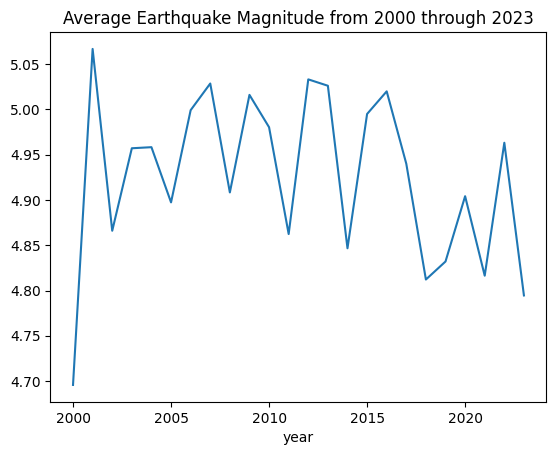

In [384]:
EarthquakesByYearData = EarthquakesByYear.groupby('year')['mag'].mean()

EarthquakesByYearData.plot(kind = 'line', title = "Average Earthquake Magnitude from 2000 through 2023")

So, it is safe to conclude that the highest earthquake magnitude was in 2001, with an average magnitude of about 5.06.

Hoever, to further assess, lets look at some statistics.

In [385]:
# assess the minimum each year
print("min per year")
print(EarthquakesByYear.groupby('year')['mag'].min())

# assess the maximum each year
print("max per year")
print(EarthquakesByYear.groupby('year')['mag'].max())

# assess the median each year
print("median per year")
print(EarthquakesByYear.groupby('year')['mag'].median())

# assess the standard deviation each year
print("standard deviation per year")
print(EarthquakesByYear.groupby('year')['mag'].std())

min per year
year
2000    4.5
2001    4.5
2002    4.5
2003    4.5
2004    4.5
2005    4.5
2006    4.5
2007    4.5
2008    4.5
2009    4.5
2010    4.5
2011    4.5
2012    4.5
2013    4.5
2014    4.5
2015    4.5
2016    4.5
2017    4.5
2018    4.5
2019    4.5
2020    4.5
2021    4.5
2022    4.5
2023    4.5
Name: mag, dtype: float64
max per year
year
2000    5.60
2001    6.80
2002    5.70
2003    6.50
2004    5.97
2005    5.60
2006    6.60
2007    6.10
2008    5.90
2009    6.90
2010    7.20
2011    6.00
2012    7.00
2013    6.60
2014    6.02
2015    6.70
2016    5.80
2017    5.80
2018    6.30
2019    7.10
2020    6.50
2021    6.20
2022    6.40
2023    5.48
Name: mag, dtype: float64
median per year
year
2000    4.600
2001    4.965
2002    4.770
2003    4.800
2004    4.890
2005    4.880
2006    4.900
2007    5.000
2008    4.865
2009    4.875
2010    4.795
2011    4.765
2012    4.835
2013    4.800
2014    4.700
2015    4.845
2016    5.005
2017    4.700
2018    4.630
2019    4.640
2020    4.8

So it looks there are some outliers, lets take a closer look.

<Axes: title={'center': 'mag'}, xlabel='year'>

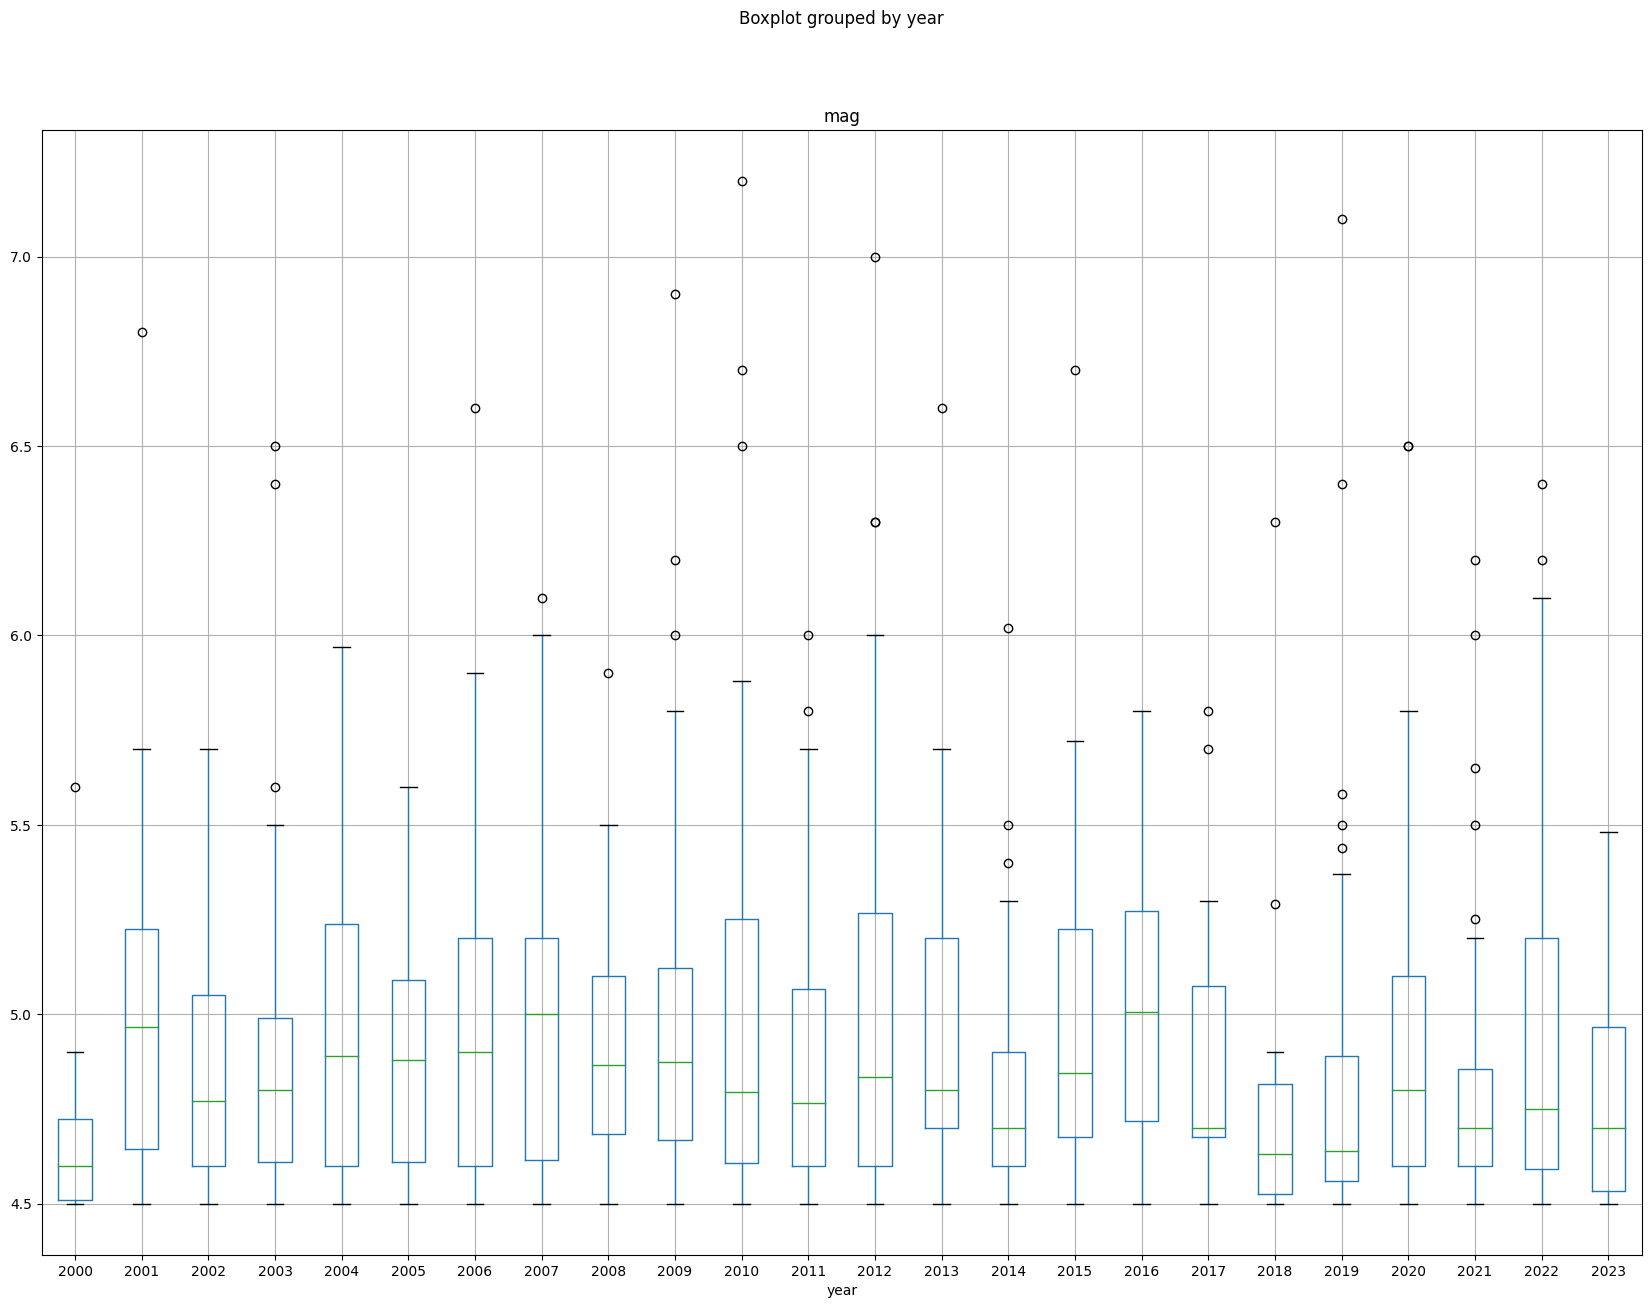

In [386]:
EarthquakesByYear.boxplot(by = 'year', column = ['mag'], figsize=(20,15))

Interesting...

So we can also conclude that 2010 had the largest outlier, but it also looks like 2019 and 2021 had the most outliers with a total of 5.

2001, 2005, 2016, and 2023 have no outliers so it is safe to use the mean to as the average. However, the rest of the years have pretty large outliers, so the median would be safer to use as a representation, since the data is heavily skewed.

Something interesting you can see is that the amount of outliers increases as the years go up. But, 2019 and 2010 having larger outliers is very alarming.

Now, lets assess the amount of earthquakes by location Source (where the earthquake occured).

First, lets clean the data set up a bit and replace instance where we see "CA" to "California", and "MX" to "Mexico".

In [387]:
# let clean up the data first
# copy
EarthquakesByLocation = EarthquakesByYear

# now go through each place and extract the state

# first replace instances
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('CA', 'California')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('MX', 'Mexico')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('NV', 'Nevada')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('NV Earthquake', 'Nevada')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('Mexico Earthquake', 'Mexico')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('California Earthquake', 'California')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('Gulf of Mexico', 'Mexico')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('Gulf of California', 'California')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('western Texas', 'Texas')
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].str.replace('Nevada Earthquake', 'Nevada')


# now get the very end of the string
def end(string):
  # splits the string then returns the very end, which is what we care about
  return string.split(',')[-1]

# now applyt this functions to every place so we get the location
EarthquakesByLocation['place'] = EarthquakesByLocation['place'].apply(end)

# now group by location, and lets see what we get
print(EarthquakesByLocation.groupby('place').size())

# theres an issue with duplicates it seems, need to merge somehow

place
 Alabama                                     1
 Arizona                                     3
 Arkansas                                    1
 Bermuda                                     2
 California                                217
 Canada                                      8
 Colorado                                    4
 Idaho                                      15
 Illinois                                    2
 Indiana                                     1
 Kansas                                      3
 Louisiana                                   2
 Maine                                       1
 Maryland                                    1
 Mexico                                    310
 Montana                                     4
 Nevada                                     48
 New Mexico                                  5
 New York                                    1
 North Carolina                              1
 Oklahoma                                   14
 Oregon

Lets rearrange this in descending order to get a better feel

In [388]:
EarthquakesByLocationGrouped = EarthquakesByLocation.groupby('place').size()
EarthquakesByLocationGroupedSorted = EarthquakesByLocationGrouped.sort_values(ascending=False)
print(EarthquakesByLocationGroupedSorted)

place
 Mexico                                    310
 California                                217
 Nevada                                     48
 Idaho                                      15
 Oklahoma                                   14
 Texas                                       9
 Canada                                      8
 Washington                                  7
 Wyoming                                     6
 Utah                                        5
 New Mexico                                  5
 Colorado                                    4
 Oregon                                      4
 Montana                                     4
 Virginia                                    3
 Arizona                                     3
off the east coast of the United States      3
 Kansas                                      3
Ridgecrest Earthquake Sequence               2
 Louisiana                                   2
 Illinois                                    2
 Bermud

Lets plot this info

<Axes: xlabel='place'>

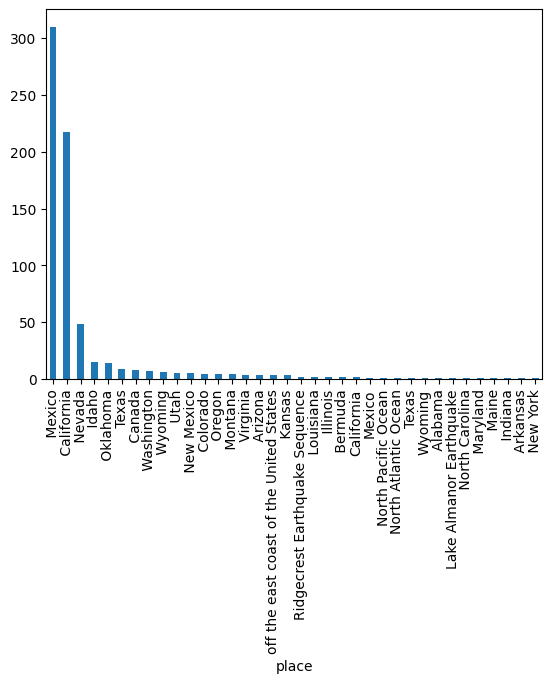

In [389]:
Data = EarthquakesByLocationGroupedSorted
Data.plot.bar()

So Mexico had the most amount of earthquakes with an amount of 310 followed by California with an amount of 217.

To take an even closer look, lets graph the Mexico and Californias magnititude of earthquake by year to see their overall trends:

Average magnitude by year in Mexico: 
year
2000    4.775714
2001    4.981667
2002    4.960000
2003    5.211250
2004    5.037500
2005    5.066667
2006    5.133529
2007    5.105263
2008    4.911765
2009    5.110000
2010    4.983714
2011    4.890313
2012    5.059500
2013    5.081818
2014    4.838462
2015    5.331667
2016    4.871429
2017    5.700000
2018    4.890000
2019    4.833333
2020    4.887143
2021    4.711290
2022    4.985000
2023    4.652857
Name: mag, dtype: float64


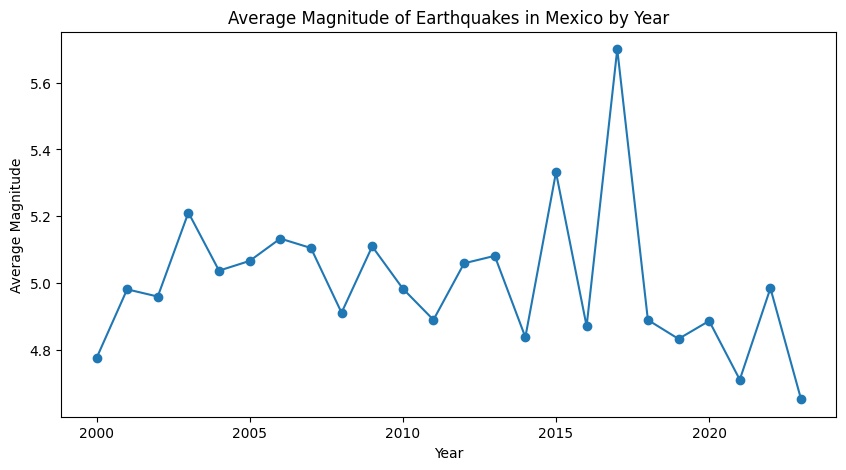

Average magnitude by year in California: 
year
2000    4.602000
2001    4.930000
2002    4.808333
2003    4.901250
2004    4.966667
2005    4.795455
2006    4.651667
2007    4.926000
2008    4.855556
2009    4.816000
2010    4.966875
2011    4.623333
2012    5.147000
2013    4.998000
2014    4.825556
2015    4.870000
2016    4.956667
2017    4.580000
2018    4.975000
2019    4.764571
2020    4.877333
2021    5.142727
2022    5.018571
2023    4.853000
Name: mag, dtype: float64


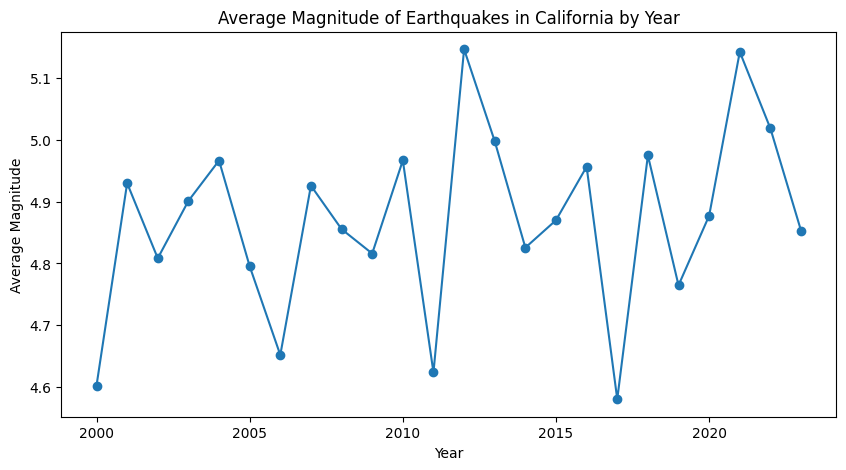

In [390]:
# making separate dfs for mexico and california

# Mexico
EarthquakesByLocationMexico = EarthquakesByYear[EarthquakesByYear['place'].str.contains('Mexico')]
EarthquakesByLocationMexico = EarthquakesByLocationMexico.groupby('year')['mag'].mean()
print("Average magnitude by year in Mexico: ")
print(EarthquakesByLocationMexico)

plt.figure(figsize=(10, 5))
plt.plot(EarthquakesByLocationMexico.index, EarthquakesByLocationMexico.values, marker='o')
plt.title('Average Magnitude of Earthquakes in Mexico by Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.show()

# California
EarthquakesByLocationCalifornia = EarthquakesByYear[EarthquakesByYear['place'].str.contains('California')]
EarthquakesByLocationCalifornia = EarthquakesByLocationCalifornia.groupby('year')['mag'].mean()
print("Average magnitude by year in California: ")
print(EarthquakesByLocationCalifornia)

plt.figure(figsize=(10, 5))
plt.plot(EarthquakesByLocationCalifornia.index, EarthquakesByLocationCalifornia.values, marker='o')
plt.title('Average Magnitude of Earthquakes in California by Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.show()

As you can see, the overall trend of the magnititudes of Earquakes in Mexico has gotten lower, with there being 1 major peak. The same for California except there are more than 1 major peaks meaning that there are more than 1 earthquakes with with extremely high magntitudes, diriving the average up.

Looking at both graphs, the trend is that there is always going to be a peak, meaning that there will always be at least one high average for the year.

---

# Hypothesis Testing

Now let us perform some hypothesis testing using an alpha value of 0.05.

This first test looks at the mean magnitudes of the least recent and most recent years in our dataset via a t-test.

**H0**: The year does not  make a statistically significant difference with regards to the magnitudes of earthquakes that occur.

**Ha**: The year makes a statistically significant difference with regards to the magnitudes of earthquakes that occur.

In [391]:
df = EarthquakesByLocation

df_2000 = df[df['year'] == 2000]
df_2023 = df[df['year'] == 2023]

t_stat, p_value = ttest_ind(df_2000['mag'], df_2023['mag'])

print(p_value)

0.34049551254424804


As we can see, the p-value ≈ 0.34, which is greather than alpha, 0.05, so we fail to reject the null hypothesis and we cannot say that the year of an earthquake has no effect on the magnitude.

Now let us conduct a t-test on another hypothesis, comparing the magnitudes of the locations with the most earthquakes: California and Mexico.

**H0**: Mexico will not have a higher mean magnitude compared to California.

**Ha**: Mexico will have a higher mean magnitude compared to California.


In [392]:
df_Mexico = df[df['place'] == 'Mexico']
df_California = df[df['place'] == 'California']

t_stat, p_value = ttest_ind(df_Mexico['mag'], df_California['mag'])

print(p_value)

0.30507862328820307


As we can see, the p-value ≈ 0.305, which is greater than alpha, 0.05, so we fail to reject the null hypothesis again. Using 2 T-tests, we've seen that both year and specific location could have some correlation with magnitude.



Now let us conduct a chi-squared on another hypothesis, comparing if an earthquake is "pretty damaging" (defined as having a magnitude of 6.1 or higher) based on its location.

**H0**: Place will not impact if it the earthquake is pretty damaging.

**Ha**: Place will impact if the earthquake is pretty damaging.


In [393]:
df2 = df.copy()

df2['mag'] = df2['mag'].apply(lambda x: 'Pretty Damaging' if x >= 6.1 else 'Not')

table = pd.crosstab(df2["place"], df2["mag"])
statistic, pvalue, dof, expected_freq = stats.chi2_contingency(table)
print(pvalue)


0.001998312465076947


We reject the null hypothesis because the p-value is extremely low (close to 0 and less than alpha), which means the probability that the observed differences are due to chance is very low.

This part of the data life cycle is used to test our own predictions about the data. If you want a more in depth explaination of hypothesis testing cick on [this link](https://realpython.com/linear-regression-in-python/)!

---

# 4. Primary Analysis


During this part of the data lifecycle, we now use machine learning techniques such as linear regression to create a predictive model of our data. This predictive model allows us to predicts values for data that isn't specifically in our dataset.

Follow this [link](https://realpython.com/linear-regression-in-python/) for more in depth information about linear regression!

In [394]:
# change the time to be more consistent and readable
df['time'] = pd.to_datetime(df['time'])

# extract features and target variable
df['year'] = df['time'].dt.year

earthquakes_by_mean_mag = df.groupby('year')['mag'].mean().reset_index()
X = earthquakes_by_mean_mag[['year']]
y = earthquakes_by_mean_mag['mag']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

# create array of future years you want to predict
future_years = pd.DataFrame([[2024], [2025], [2026], [2027], [2028], [2029], [2030], [2031], [2032], [2033], [2034], [2035]], columns = ["year"])
predicted_mean_mags = model.predict(future_years)

r_2 = model.score(X_test, y_test)
print(f"R^2: %r" % r_2)

R^2: 0.047836979894097076


# 5. Visualization

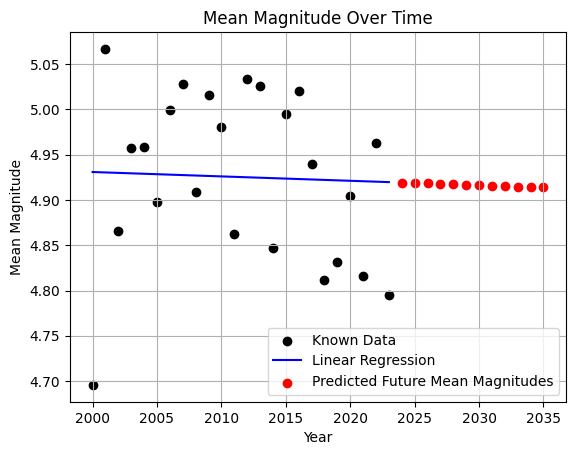

In [395]:
# Plot the graph
plt.scatter(X, y, color='black', label='Known Data')
plt.plot(X, model.predict(X), color='blue', label='Linear Regression')
plt.scatter(future_years, predicted_mean_mags, color='red', label='Predicted Future Mean Magnitudes')

plt.xlabel("Year")
plt.ylabel("Mean Magnitude")
plt.title("Mean Magnitude Over Time")
plt.legend()
plt.grid(True)
plt.show()

Based on the scatterplot with known data, we can see there is an overall negtive association between the mean magnititude of the earthquake, and the year, menaing that in earlier years, the mean magnitude of the earthquakes were much more higher, and have started to go lower more recently. However, there are special cases in which the data is split between high and low mean magnitiudes so it is hard to tell.


The Linear Regression model predicts that the future mean magnitutdes will be slightly lower throughout the years, but based on the known data that is hard to tell since for at least one low magnititude value, it is preceded by a high magnititude value in the following year.

One can observe the lower correlation between the points denoted by the R^2 value of 0.045. The model predicts a slight downward trend, which is plausible given the known data.

---

# 6. Insights and Conclusions

Through data analysis and hypothesis testing we can determine that while location does have an effect on the magnitude of earthquakes, the increasing global temperature doesn't seem to have an effect in our time range. However, this could change over a larger time frame as only 2 decades might not have a noticable effect on earthquake intensity.

Furthermore, what we can conclude from analysis is that the areas of interest that do need to be kept a close eye on are Mexico and California, with their alarmingly high amount of earthquakes and stats over the past 2 decades. Those locations in particular bear the brunt of earthquakes, which could be the result of them being a part of the Pacific Ring of Fire.

One of the limitations of our project is that our data is limited to earthquakes in the United States (plus Canada and Mexico). We can expand on our research in a future project by focusing specifically on locations in areas with a relatively high-frequency rate in a region on the boundary of tectonic plates (such as the Pacific Ring of Fire). Then we can focus on determining which variables most separate the locations with more frequent/more damaging earthquakes and the locations with the least frequent/least damaging earthquakes of the region.